In [1]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('WSe2_prop.out').read_relativistics('WSe2_prop.f25',
                                                            type='MAGNETIZ')

In [2]:
obj.base

array([[-0.6473319 ,  2.96306958,  0.        ],
       [-0.6473319 , -0.48937832,  0.        ],
       [ 2.14228927, -2.09996038,  0.        ]])

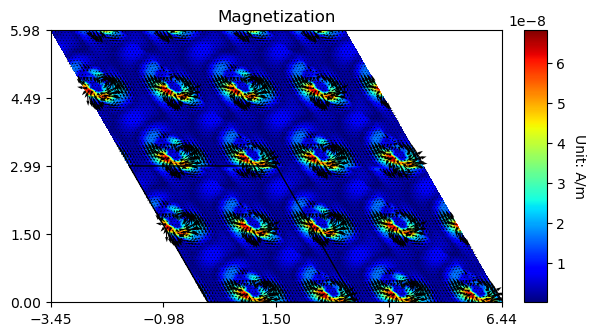

In [4]:
import numpy as np

levels = np.linspace(-1, 2, 100)*1e-8

fig = obj.plot_2D(colorplot=True, rectangle=False, a_range=[-1,1], b_range=[-1,1], edgeplot=True)

In [5]:
obj._set_unit('a.u.')
obj.data[0, 0]

array([0.0582575])